<a href="https://colab.research.google.com/github/helgadenes/Astrophysics_yachay/blob/main/python_tutorials%20/HR-diagram/Pleiades_proper_motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identifying the Pleiades open cluster using proper motion data

Inspired by this tutorial: https://starry-project.eu/tutorial/

This tutorial:
- downloads data from the **GAIA DR3** data release in the direction of the Pleiades open cluster
- demosntrates the data with some simple plots
- creates an HR diagram for the Pleiades cluster


Information on data access: https://astroquery.readthedocs.io/en/latest/gaia/gaia.html  

Information on open clusters and the HR diagram: https://github.com/helgadenes/Astrophysics_yachay/blob/main/Slides/Astro_3.2.pdf

More information on the Pleiades star cluster: https://en.wikipedia.org/wiki/Pleiades

In [1]:
# astroquery is not a default package in google colab
!pip install astroquery

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.8/910.8 kB 12.4 MB/s eta 0:00:00


In [2]:
# loading the libraries that we are going to use

import numpy as np
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia
import astropy.units as u
from astropy.coordinates import SkyCoord

In [3]:
# Define the source of the data

Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source"  # Reselect Data Release 3, default
Gaia.ROW_LIMIT = -1  # this will get us an unlimited number of raws of data, you can set this to a set number as well to get a smaller table


In [4]:
# Defining the location of the star cluster that we are going to use, in this case the Pleiades cluster

c = SkyCoord.from_name('Pleiades')

print(c.ra.deg, c.dec.deg)

56.601 24.114


In [5]:
# Searching for the data
# box search around specific coordinates
# This may take a bit of time - there are millions of objects in the GAIA data base

coord = SkyCoord(ra=c.ra.deg, dec=c.dec.deg, unit=(u.degree, u.degree), frame='icrs')
width = u.Quantity(2.0, u.deg)
height = u.Quantity(2.0, u.deg)
r = Gaia.query_object_async(coordinate=coord, width=width, height=height)

r.pprint(max_lines=12, max_width=130)  # inspecting a section of the results

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
        dist             solution_id            DESIGNATION         ... ebpminrp_gspphot_upper libname_gspphot
                                                                    ...          mag                          
-------------------- ------------------- -------------------------- ... ---------------------- ---------------
0.006337645533631022 1636148068921376768 Gaia DR3 65225091345088128 ...                     --                
0.006440119370323977 1636148068921376768 Gaia DR3 65225130001307776 ...                     --                
0.009046829012056418 1636148068921376768 Gaia DR3 65225095641479808 ...                 0.2611         PHOENIX
                 ...                 ...                        ... ...                    ...             ...
  1.3455135659768918 1636148068921376768 Gaia DR3 65049689175417472 ...                     --                
  1.3465238710266207 1636148068921376768 Gaia DR3 641721371619

In [6]:
# keys in the data set:
# This tells us what data columns we have in the table, coordinates, parallax measurment, magnitudes,colours, etc ...

r.keys()

['dist',
 'solution_id',
 'DESIGNATION',
 'SOURCE_ID',
 'random_index',
 'ref_epoch',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'parallax_over_error',
 'pm',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'astrometric_n_obs_al',
 'astrometric_n_obs_ac',
 'astrometric_n_good_obs_al',
 'astrometric_n_bad_obs_al',
 'astrometric_gof_al',
 'astrometric_chi2_al',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_params_solved',
 'astrometric_primary_flag',
 'nu_eff_used_in_astrometry',
 'pseudocolour',
 'pseudocolour_error',
 'ra_pseudocolour_corr',
 'dec_pseudocolour_corr',
 'parallax_pseudocolour_corr',
 'pmra_pseudocolour_corr',
 'pmdec_pseudocolour_corr',
 'astrometric_matched_transits',
 'visibility_periods_used',
 'astrometric_si

## Test plots

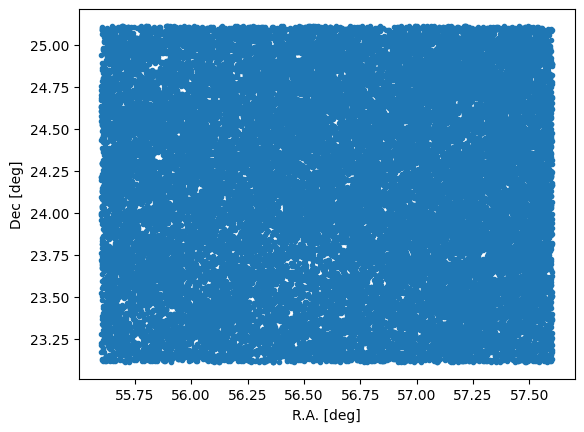

In [7]:
# Let's plot where are the stars in the sky (R.A. and Dec)

fig, ax = plt.subplots()
plt.plot(r['ra'], r['dec'], linestyle='', marker='.' )
ax.set_xlabel(r'R.A. [deg]')
ax.set_ylabel(r'Dec [deg]')
plt.show()

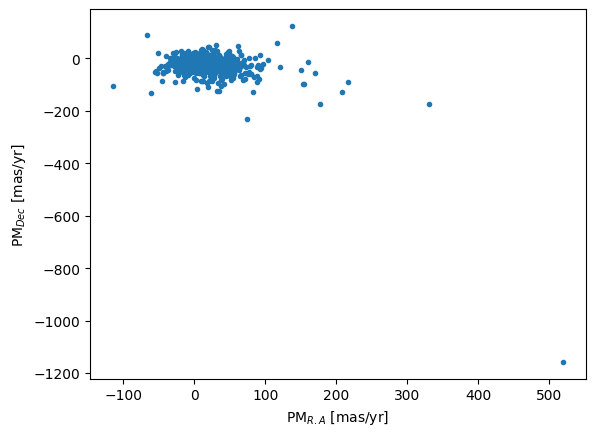

In [8]:
# Let's plot the proper motion in R.A. and Dec -> this is how the stars move in the plane of the sky
# The units of proper motion are milliarcsecond per year

fig, ax = plt.subplots()
plt.plot(r['pmra'], r['pmdec'], linestyle='', marker='.' )
ax.set_xlabel(r'PM$_{R.A}$ [mas/yr]')
ax.set_ylabel(r'PM$_{Dec}$ [mas/yr]')
plt.show()

## Analysing the proper motion data

Star clusters were born together -> when they are young they should move the same way. -> Their proper motion should be the same.

**What do you notice from the plot?**

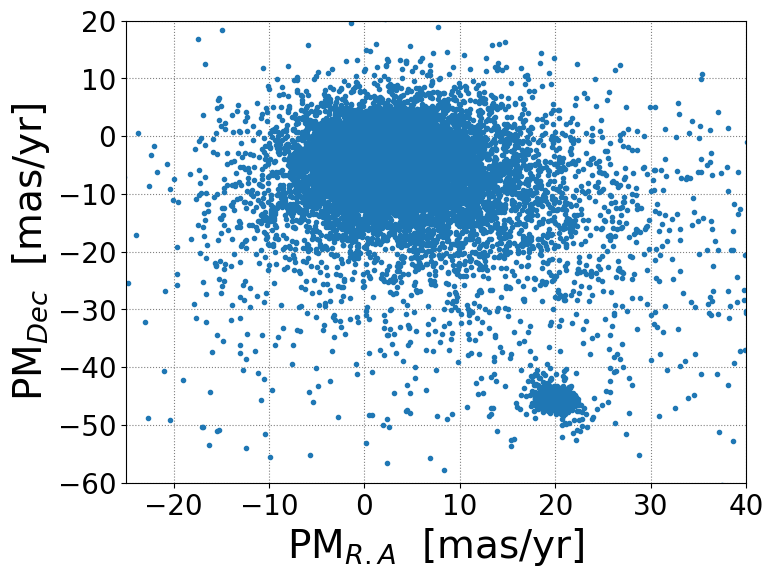

In [9]:
# Let's restrict the axes to zoom in our data

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(r['pmra'], r['pmdec'], linestyle='', marker='.' )
plt.xlabel("PM$_{R.A}$  [mas/yr]", fontsize=28)
plt.ylabel('PM$_{Dec}$  [mas/yr]', fontsize=28)

plt.xlim(-25,40)
plt.ylim(-60,20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

## The HR diagram for the full data set

**What do you notice?**

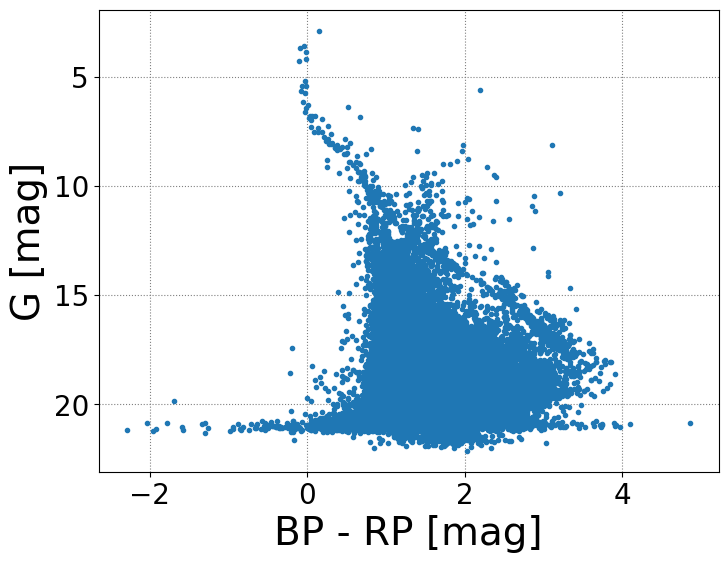

In [29]:
# Plotting the HR diagram: colour vs. magnitude

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(r['bp_rp'], r['phot_g_mean_mag'], linestyle='', marker='.' )
plt.xlabel("BP - RP [mag]", fontsize=28)
plt.ylabel('G [mag]', fontsize=28)

ax.invert_yaxis()
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

## Selecting the Pleiades star cluster based on the proper motion of the stars

The Peiades cluster is the smaller clump in the proper motion diagram.

In [11]:
# creating a data frame with a sub set of the data

mask = (r['pmra'] < 25) & (r['pmra'] > 15) & (r['pmdec'] < -40) & (r['pmdec'] > -50)  # Makes a boolean selection mask (numpy array)
r_P = r[mask]  # Makes a new astropy Table


In [12]:
# Number of rows in the new sub array

len(r_P)

594

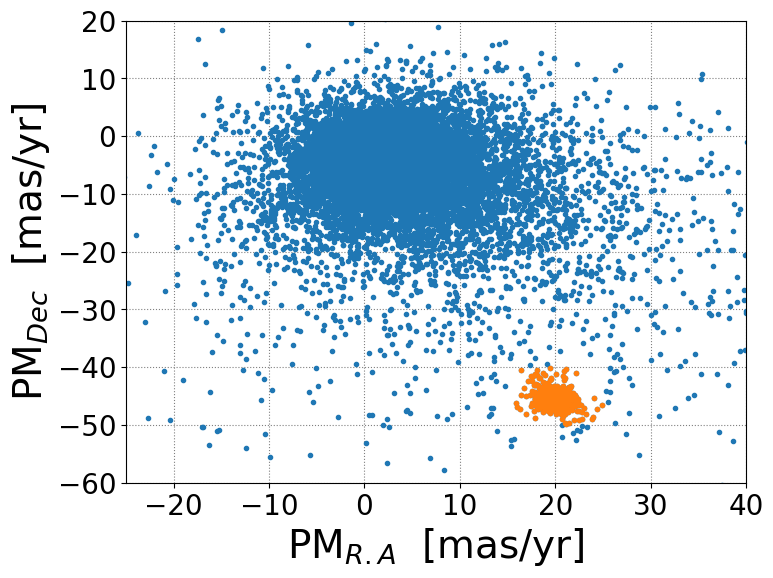

In [13]:
# Let's check which stars we selected:

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(r['pmra'], r['pmdec'], linestyle='', marker='.' )
plt.plot(r_P['pmra'], r_P['pmdec'], linestyle='', marker='.' )
plt.xlabel("PM$_{R.A}$  [mas/yr]", fontsize=28)
plt.ylabel('PM$_{Dec}$  [mas/yr]', fontsize=28)

plt.xlim(-25,40)
plt.ylim(-60,20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

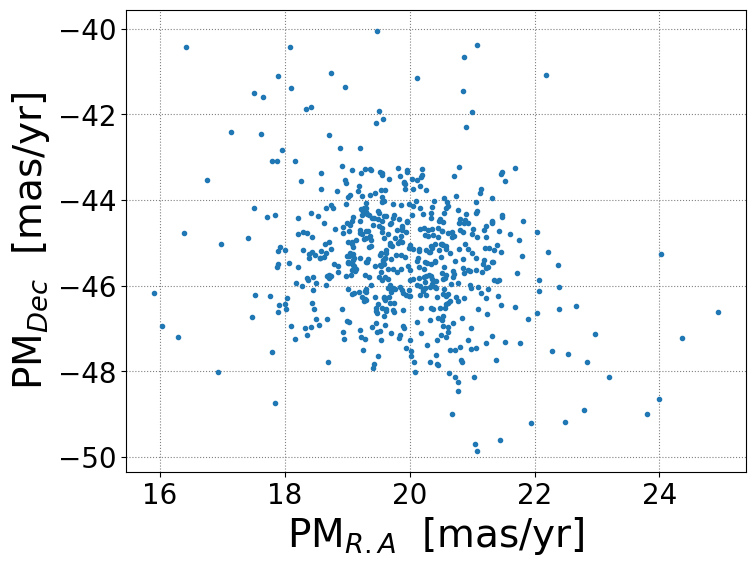

In [14]:
# Zoom in on the selected stars

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(r_P['pmra'], r_P['pmdec'], linestyle='', marker='.' )
plt.xlabel("PM$_{R.A}$  [mas/yr]", fontsize=28)
plt.ylabel('PM$_{Dec}$  [mas/yr]', fontsize=28)

ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

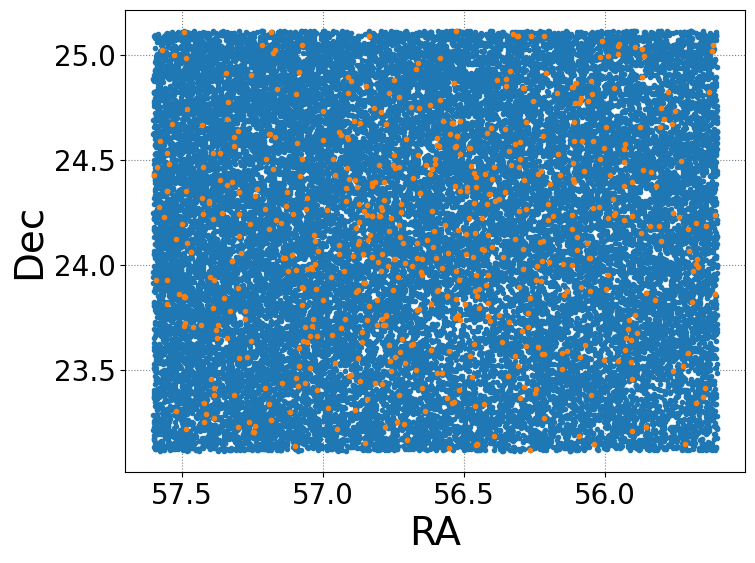

In [15]:
# Where are these stars located in the sky?

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(r['ra'], r['dec'], linestyle='', marker='.' )
plt.plot(r_P['ra'], r_P['dec'], linestyle='', marker='.' )
plt.xlabel("RA", fontsize=28)
plt.ylabel('Dec', fontsize=28)

ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

The proper motion is a powerfull method to identify star clusters.

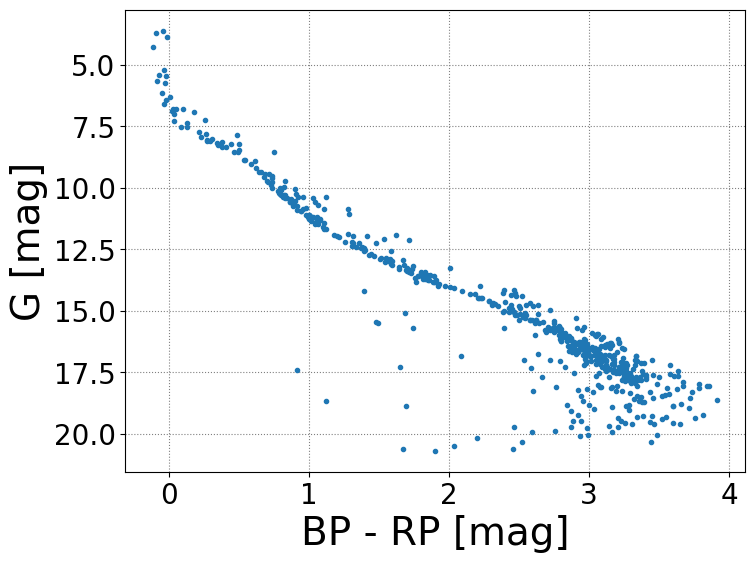

In [30]:
# Let's make the HR diagram for the selected stars

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(r_P['bp_rp'], r_P['phot_g_mean_mag'], linestyle='', marker='.' )
plt.xlabel("BP - RP [mag]", fontsize=28)
plt.ylabel('G [mag]', fontsize=28)

ax.invert_yaxis()
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

## Add another cluster


In [17]:
c_2 = SkyCoord.from_name('NGC 752')

print(c_2.ra.deg, c_2.dec.deg)

29.223 37.794


In [18]:
# Searching for the data
# box search around specific coordinates

coord = SkyCoord(ra=c_2.ra.deg, dec=c_2.dec.deg, unit=(u.degree, u.degree), frame='icrs')
width = u.Quantity(2.0, u.deg)
height = u.Quantity(2.0, u.deg)
r_2 = Gaia.query_object_async(coordinate=coord, width=width, height=height)


INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


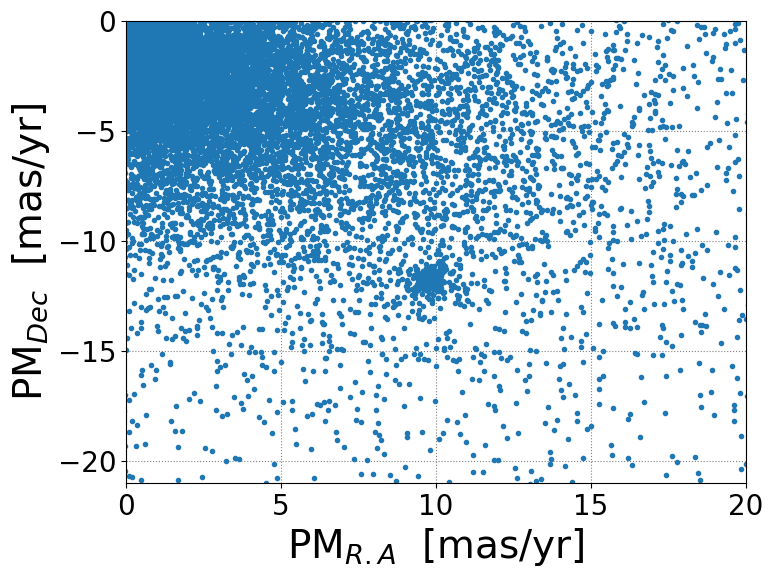

In [19]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(r_2['pmra'], r_2['pmdec'], linestyle='', marker='.' )
plt.xlabel("PM$_{R.A}$  [mas/yr]", fontsize=28)
plt.ylabel('PM$_{Dec}$  [mas/yr]', fontsize=28)

plt.xlim(0,20)
plt.ylim(-21,0)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

In [20]:
# creating a data frame with a sub set of the data

mask = (r_2['pmra'] < 12) & (r_2['pmra'] > 8) & (r_2['pmdec'] < -10) & (r_2['pmdec'] > -13)  # Makes a boolean selection mask (numpy array)
r_C2 = r_2[mask]  # Makes a new astropy Table

In [21]:
# Number of rows in the new sub array

len(r_C2)

400

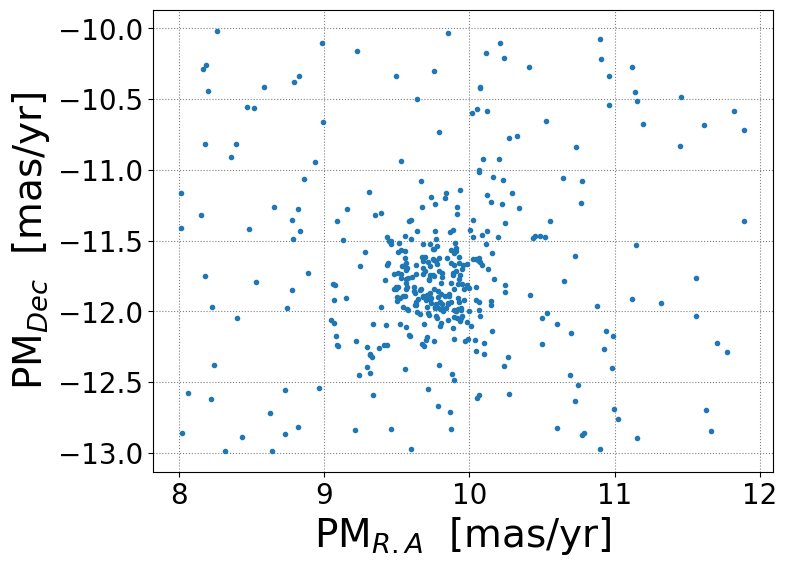

In [22]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(r_C2['pmra'], r_C2['pmdec'], linestyle='', marker='.' )
plt.xlabel("PM$_{R.A}$  [mas/yr]", fontsize=28)
plt.ylabel('PM$_{Dec}$  [mas/yr]', fontsize=28)

#plt.xlim(-30,40)
#plt.ylim(-60,10)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

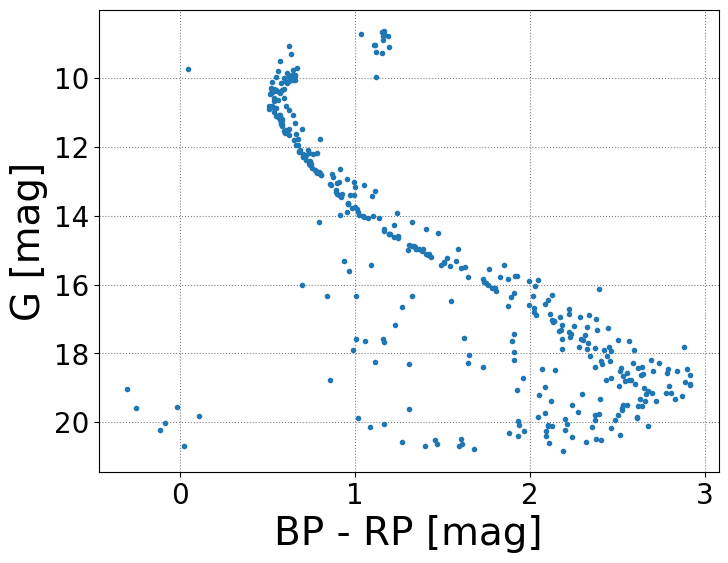

In [31]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(r_C2['bp_rp'], r_C2['phot_g_mean_mag'], linestyle='', marker='.' )
plt.xlabel("BP - RP [mag]", fontsize=28)
plt.ylabel('G [mag]', fontsize=28)

ax.invert_yaxis()
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

## Comparing the two star clusters

**Which cluster is younger?**

**What is the reason of the offsets?**

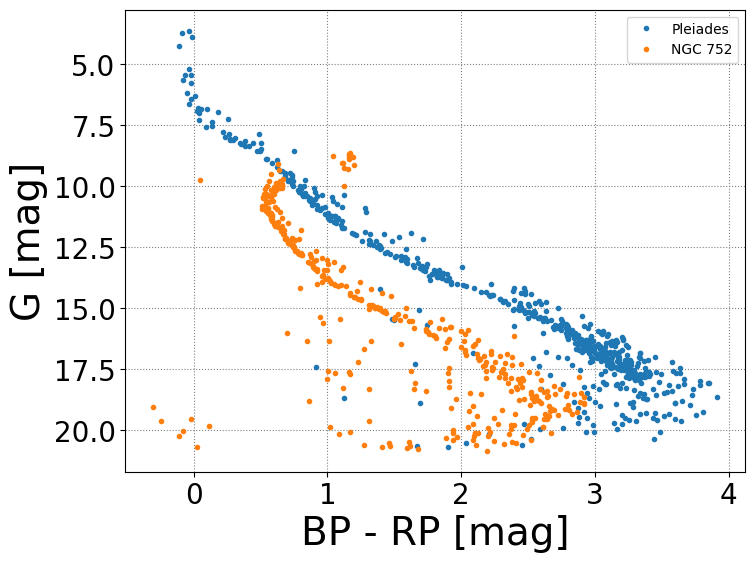

In [32]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(r_P['bp_rp'], r_P['phot_g_mean_mag'], linestyle='', marker='.' , label='Pleiades')
plt.plot(r_C2['bp_rp'], r_C2['phot_g_mean_mag'], linestyle='', marker='.' , label='NGC 752')
plt.xlabel("BP - RP [mag]", fontsize=28)
plt.ylabel('G [mag]', fontsize=28)

ax.invert_yaxis()
plt.legend()
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

## Making a function to get data for various star clusters

**How do we know the proper motion of the cluster?**

We can check this in teh CDS Simbad data base: https://simbad.cds.unistra.fr/simbad/
1. Search the name of the object in the "Basic Search" section
2. Look for: "Proper motions mas/yr"

In [25]:
def get_cluster_data(name, box, proper_motion_lim):
    c = SkyCoord.from_name(name)

    coord = SkyCoord(ra=c.ra.deg, dec=c.dec.deg, unit=(u.degree, u.degree), frame='icrs')
    width = u.Quantity(box[0], u.deg)
    height = u.Quantity(box[1], u.deg)
    r = Gaia.query_object_async(coordinate=coord, width=width, height=height)

    # creating a data frame with a sub set of the data

    mask = (r['pmra'] < proper_motion_lim[1]) & (r['pmra'] > proper_motion_lim[0]) & (r['pmdec'] < proper_motion_lim[3]) & (r['pmdec'] > proper_motion_lim[2])  # Makes a boolean selection mask (numpy array)
    r_P = r[mask]  # Makes a new astropy Table

    return r_P

In [26]:
ngc_752 = get_cluster_data('NGC 752', [2.0, 2.0], [8, 12, -13, -10])

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


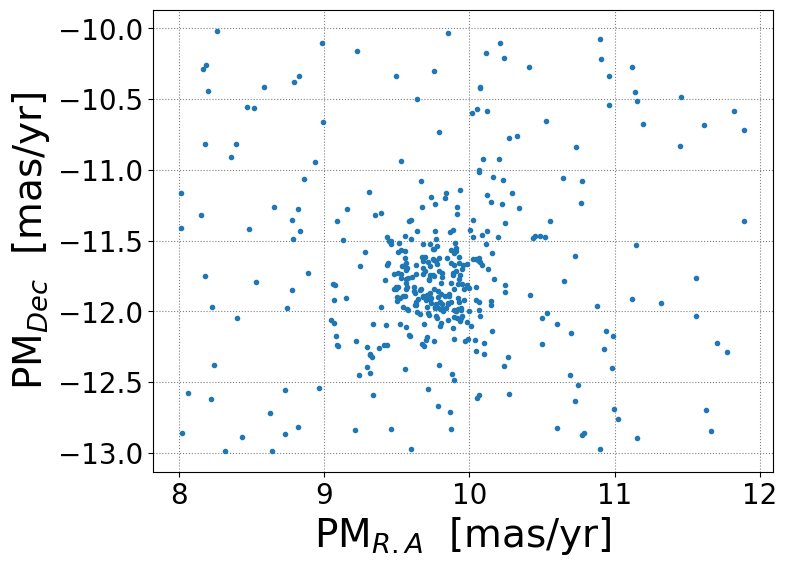

In [27]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(ngc_752['pmra'], ngc_752['pmdec'], linestyle='', marker='.' )
plt.xlabel("PM$_{R.A}$  [mas/yr]", fontsize=28)
plt.ylabel('PM$_{Dec}$  [mas/yr]', fontsize=28)

ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

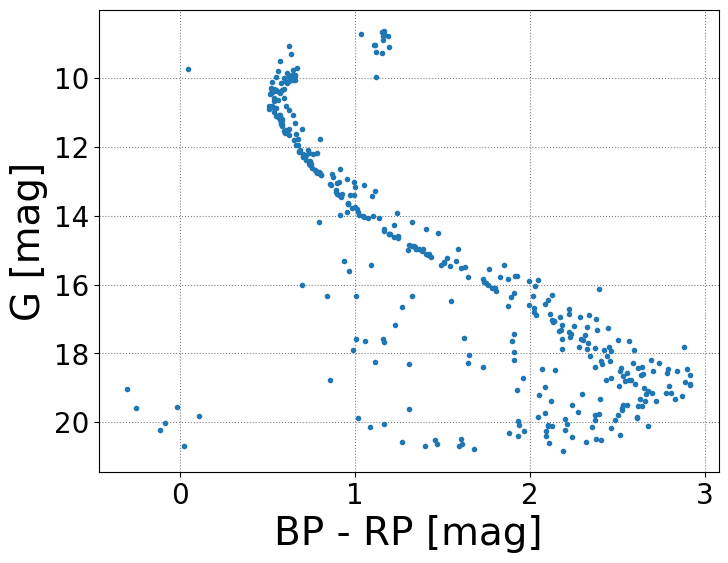

In [33]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(ngc_752['bp_rp'], ngc_752['phot_g_mean_mag'], linestyle='', marker='.' )
plt.xlabel("BP - RP [mag]", fontsize=28)
plt.ylabel('G [mag]', fontsize=28)

ax.invert_yaxis()
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()